# Introduction
- nb10に手を加える
- type_0とtype_1 を追加(例: 1JHH ---> 1, JHH)
    > https://www.kaggle.com/artgor/molecular-properties-eda-and-models
- atom_0 と atom_1 を one-hot-encoding

# Import everything I nead :)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

# Data Preparation

In [25]:
path = './dataframe/20190609_nb10_train.csv'
df_train = pd.read_csv(path)

path = './dataframe/20190609_nb10_test.csv'
df_test = pd.read_csv(path)

# FeatureEngineering

## type の分解
    - 1JHH ---> 1, JHH

In [26]:
df_train['type_0'] = df_train['type'].apply(lambda x: x[0])
df_train['type_1'] = df_train['type'].apply(lambda x: x[1:])

df_test['type_0'] = df_test['type'].apply(lambda x: x[0])
df_test['type_1'] = df_test['type'].apply(lambda x: x[1:])

# one-hot-encoding
types = df_train[['type_0', 'type_1']]
df_train = pd.get_dummies(data=df_train, columns=['type_0', 'type_1'])
df_train[['type_0', 'type_1']] = atoms

types = df_test[['type_0', 'type_1']]
df_test = pd.get_dummies(data=df_test, columns=['type_0', 'type_1'])
df_test[['type_0', 'type_1']] = atoms

---
**plot**

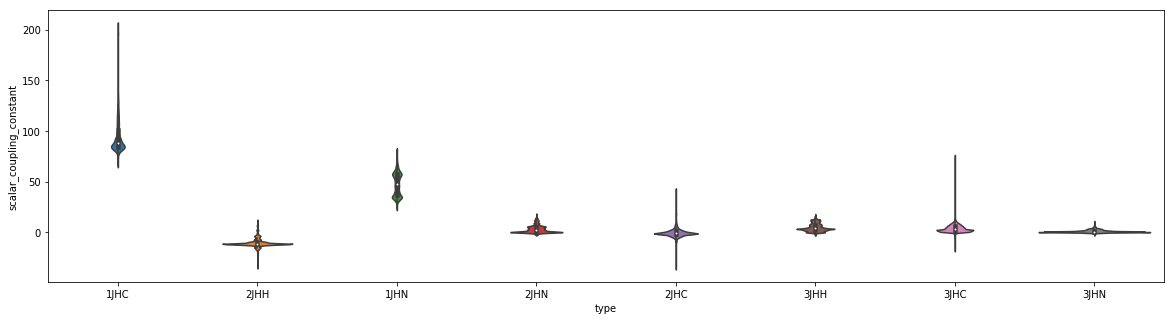

In [27]:
# type
plt.figure(figsize=(20,5))
sns.violinplot(x='type', y='scalar_coupling_constant', data=df_train)

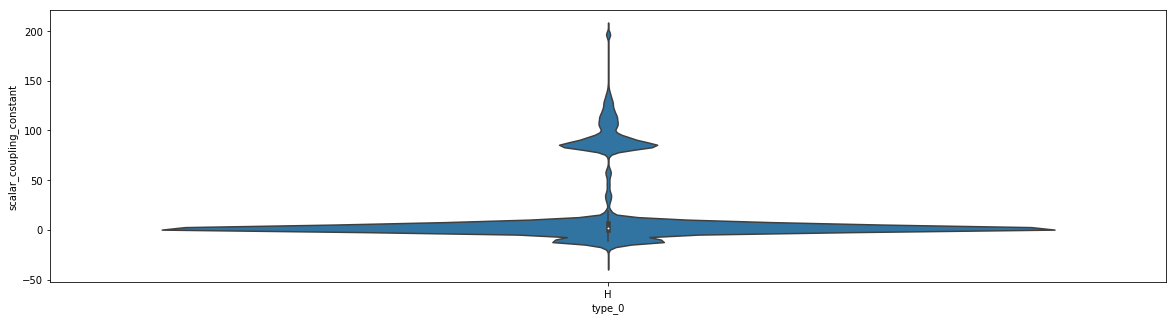

In [28]:
# type_0
plt.figure(figsize=(20,5))
sns.violinplot(x='type_0', y='scalar_coupling_constant', data=df_train)

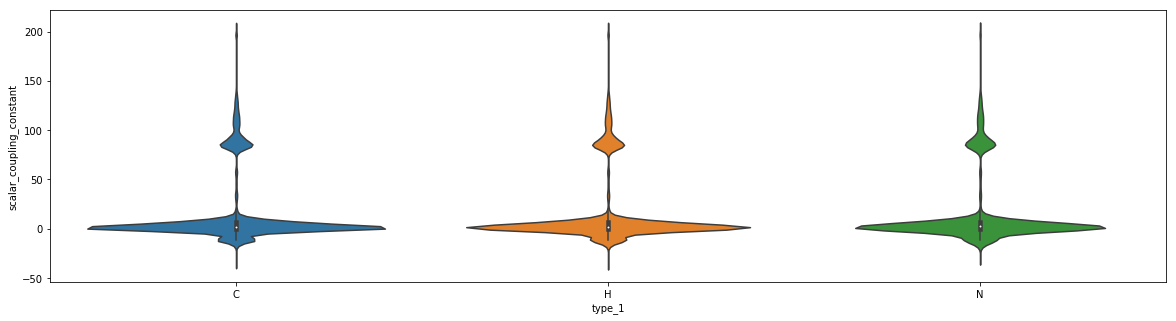

In [29]:
# type_1
plt.figure(figsize=(20,5))
sns.violinplot(x='type_1', y='scalar_coupling_constant', data=df_train)

## atom_0, atom_1 をone-hot-encoding

In [30]:
df_train.iloc[:, 0:20].head(1)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_count,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,dist_to_type_mean,atom_0_cat,atom_1_cat,1JHC
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,5,H,0.00215,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,0.999134,0,1,1


---
**カテゴリカル変数(atom_0_cat, atom_1_cat)を削除**

In [31]:
df_train = df_train.drop(columns=['atom_0_cat', 'atom_1_cat'])
df_test  = df_test.drop(columns=['atom_0_cat', 'atom_1_cat'])

df_train.iloc[:, 0:20].head(1)

,id,molecule_name,atom_index_0,atom_index_1,type,scalar_coupling_constant,atom_count,atom_0,x_0,y_0,z_0,atom_1,x_1,y_1,z_1,dist,dist_to_type_mean,1JHC,1JHN,2JHC
0,0,dsgdb9nsd_000001,1,0,1JHC,84.8076,5,H,0.00215,-0.006031,0.001976,C,-0.012698,1.085804,0.008001,1.091953,0.999134,1,0,0


---
**one-hot-encoding**

In [32]:
atoms = df_train[['atom_0', 'atom_1']]
df_train = pd.get_dummies(data=df_train, columns=['atom_0', 'atom_1'])
df_train[['atom_0', 'atom_1']] = atoms

atoms = df_test[['atom_0', 'atom_1']]
df_test = pd.get_dummies(data=df_test, columns=['atom_0', 'atom_1'])
df_test[['atom_0', 'atom_1']] = atoms

---> atom_0_H は1しかない!!

In [33]:
df_train.columns

Index(['id', 'molecule_name', 'atom_index_0', 'atom_index_1', 'type',
       'scalar_coupling_constant', 'atom_count', 'x_0', 'y_0', 'z_0', 'x_1',
       'y_1', 'z_1', 'dist', 'dist_to_type_mean', '1JHC', '1JHN', '2JHC',
       '2JHH', '2JHN', '3JHC', '3JHH', '3JHN', 'type_0_1', 'type_0_2',
       'type_0_3', 'type_1_JHC', 'type_1_JHH', 'type_1_JHN', 'type_0',
       'type_1', 'atom_0_H', 'atom_1_C', 'atom_1_H', 'atom_1_N', 'atom_0',
       'atom_1'],
      dtype='object')

# Save DataFrame

In [34]:
path = './dataframe/20190614_nb12_train.csv'
df_train.to_csv(path, encoding='utf-8', index=False)

In [35]:
path = './dataframe/20190614_nb12_test.csv'
df_test.to_csv(path, encoding='utf-8', index=False)